# Урок 5. Рекуррентные нейронные сети
# Домашнее задание

In [ ]:
# importing the tensorflow package
import tensorflow as tf

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### <span class="burk">Задание 1.</span>
**Попробуйте изменить параметры нейронной сети, работающей с датасетом ```imdb```, либо
нейронной сети, работающей ```airline-passengers``` (она прилагается вместе с датасетом к
уроку в виде отдельного скрипта) так, чтобы улучшить её точность. Приложите анализ.**

## IMDB reviews (keras)

In [ ]:
from __future__ import print_function

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

In [ ]:
max_features = 100000

# обрезание текстов после данного количества слов (среди top max_features наиболее используемые слова)
maxlen = 150
batch_size = 300 # увеличьте значение для ускорения обучения

In [ ]:
print('Загрузка данных...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

Загрузка данных...


In [ ]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [ ]:
# Retrieve the word index file mapping words to indices
word_index = imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
inverted_word_index = dict((i, word) for (word, i) in word_index.items())
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])

In [ ]:
decoded_sequence

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room titillate it so heart shows to years of every never going villaronga help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of gilmore's br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but wh

In [ ]:
print(len(x_train), 'тренировочные последовательности')
print(len(x_test), 'тестовые последовательности')

25000 тренировочные последовательности
25000 тестовые последовательности


In [ ]:
len(x_train[0])

218

In [ ]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 150)
x_test shape: (25000, 150)


In [ ]:
max_features

100000

In [ ]:
layer = Embedding(max_features, 128)

In [ ]:
layer(x_train[0]).shape

TensorShape([150, 128])

In [ ]:
print('Построение модели...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(1, activation='sigmoid'))

Построение модели...


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
print('Процесс обучения...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=2, # увеличьте при необходимости
          validation_data=(x_test, y_test))

Процесс обучения...
Epoch 1/2
84/84 [==============================] - 64s 729ms/step - loss: 0.5087 - accuracy: 0.7365 - val_loss: 0.3523 - val_accuracy: 0.8557
Epoch 2/2
84/84 [==============================] - 59s 702ms/step - loss: 0.2103 - accuracy: 0.9211 - val_loss: 0.3144 - val_accuracy: 0.8662


In [ ]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)

84/84 [==============================] - 4s 47ms/step - loss: 0.3144 - accuracy: 0.8662


In [ ]:
print('Результат при тестировании:', score)
print('Тестовая точность:', acc)

Результат при тестировании: 0.3144340217113495
Тестовая точность: 0.8662400245666504


### <span class="girk">Выводы:</span>  
 1. Удалось повысить точность модели на сете IMDB до 0,86 путём увеличения максимального количества признаков до 100 000. 
 2. При этом был увеличен ```batch_size``` до 300.
 3. Также была увеличена ```max_len``` до 150. 
 4. Количество эпох было увеличено до 2. Большее количество эпох ведёт к переобучению.

### <span class="burk">Задание 2.</span>
**Попробуйте изменить параметры нейронной сети, генерирующей текст таким образом,
чтобы добиться генерации как можно более осмысленного текста. Пришлите лучший
текст из получившихся и опишите предпринятые для его получения действия. Можно
использовать текст другого произведения.**

## Генерация текста на основе ~~книжки «Алиса в стране чудес»~~ статьи о ЯП [Python](https://ru.wikipedia.org/wiki/Python) из Википедии

In [ ]:
import numpy as np
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU
from tensorflow.keras.models import Sequential

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# построчное чтение из примера с текстом 
# with open("/content/drive/MyDrive/Colab Notebooks/13_5_files/13_5_python_wikipedia.txt", 'rb') as _in:
with open("13_5_files/13_5_python_wikipedia.txt", 'rb') as _in:
    lines = []
    for line in _in:
        line = line.strip().lower().decode("utf8", "ignore")
        if len(line) == 0:
            continue
        lines.append(line)
text = " ".join(lines)
chars = set(text)
nb_chars = len(chars)

In [ ]:
len(chars)

150

In [ ]:
# создание индекса символов и reverse mapping чтобы передвигаться между значениями numerical
# ID and a specific character. The numerical ID will correspond to a column
# ID и определенный символ. Numerical ID будет соответсвовать колонке
# число при использовании one-hot кодировки для представление входов символов
char2index = {c: i for i, c in enumerate(chars)}
index2char = {i: c for i, c in enumerate(chars)}

In [ ]:
index2char

{0: 'ч',
 1: 'ь',
 2: 'z',
 3: '8',
 4: 'р',
 5: '/',
 6: '–',
 7: 'θ',
 8: '5',
 9: 'Р',
 10: ')',
 11: 'Э',
 12: 'Д',
 13: 'b',
 14: 'с',
 15: 'ю',
 16: 'т',
 17: 'ф',
 18: 'ˈ',
 19: 'i',
 20: '6',
 21: 'Е',
 22: '-',
 23: 'ъ',
 24: 'p',
 25: '|',
 26: '\\',
 27: ':',
 28: '(',
 29: 'е',
 30: '3',
 31: 'л',
 32: '[',
 33: 'С',
 34: '@',
 35: 'Г',
 36: 'у',
 37: '?',
 38: 'ё',
 39: ']',
 40: 'В',
 41: 'я',
 42: 'x',
 43: 'ш',
 44: '_',
 45: '>',
 46: '—',
 47: '№',
 48: 'ц',
 49: 'd',
 50: 'Ж',
 51: 'g',
 52: 'Ъ',
 53: 't',
 54: 'ɪ',
 55: '0',
 56: 'в',
 57: 'q',
 58: 'б',
 59: '+',
 60: '9',
 61: 'Л',
 62: 'щ',
 63: '←',
 64: '“',
 65: 'о',
 66: '`',
 67: 'и',
 68: 'e',
 69: '!',
 70: 'г',
 71: 'п',
 72: 'v',
 73: 'j',
 74: 'И',
 75: 'Х',
 76: 'm',
 77: 'ы',
 78: 'д',
 79: '\u200b',
 80: 's',
 81: ';',
 82: 'r',
 83: '’',
 84: 'u',
 85: '®',
 86: '2',
 87: 'Ч',
 88: 'Ц',
 89: '#',
 90: 'У',
 91: '%',
 92: '"',
 93: 'к',
 94: 'Н',
 95: 'й',
 96: 'М',
 97: '4',
 98: 'ʌ',
 99: 'з',
 100

In [ ]:
# для удобства выберете фиксированную длину последовательность 10 символов 
SEQLEN, STEP = 100, 1
input_chars, label_chars = [], []

# конвертация data в серии разных SEQLEN-length субпоследовательностей
for i in range(0, len(text) - SEQLEN, STEP):
    input_chars.append(text[i: i + SEQLEN])
    label_chars.append(text[i + SEQLEN])

In [ ]:
len(input_chars)

116429

In [ ]:
input_chars[0], label_chars[0]

('python Материал из Википедии — свободной энциклопедии Текущая версия страницы пока не проверялась оп',
 'ы')

In [ ]:
input_chars[1], label_chars[1]

('ython Материал из Википедии — свободной энциклопедии Текущая версия страницы пока не проверялась опы',
 'т')

In [ ]:
# Вычисление one-hot encoding входных последовательностей X и следующего символа (the label) y

X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=np.bool)
y = np.zeros((len(input_chars), nb_chars), dtype=np.bool)
for i, input_char in enumerate(input_chars):
    for j, ch in enumerate(input_char):
        X[i, j, char2index[ch]] = 1
    y[i, char2index[label_chars[i]]] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [ ]:
X.shape

(116429, 100, 150)

In [ ]:
# установка ряда метапамертров  для нейронной сети и процесса тренировки
BATCH_SIZE, HIDDEN_SIZE = 256, 256
NUM_ITERATIONS = 25 # 25 должно быть достаточно
NUM_EPOCHS_PER_ITERATION = 2
NUM_PREDS_PER_EPOCH = 100

In [ ]:
'''
Создание очень простой рекуррентной нейронной сети. В ней будет один реккурентный закодированный входной слой. 
За ним последует полносвязный слой связанный с набором возможных следующих символов, 
которые конвертированы в вероятностные результаты через стандартную softmax активацию 
с multi-class cross-encoding loss функцию ссылающуются на предсказание one-hot encoding лейбл символа
'''

model = Sequential()
model.add(
    GRU(  # вы можете изменить эту часть на LSTM или SimpleRNN, чтобы попробовать альтернативы
        HIDDEN_SIZE,
        return_sequences=True,
        input_shape=(SEQLEN, nb_chars),
        unroll=True
    )
)

model.add(
    GRU(  # вы можете изменить эту часть на LSTM или SimpleRNN, чтобы попробовать альтернативы
        HIDDEN_SIZE,
        return_sequences=False,
        unroll=True
    )
)

model.add(Dense(nb_chars))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop")

In [ ]:
# выполнение серий тренировочных и демонстрационных итераций 
for iteration in range(NUM_ITERATIONS):

    # для каждой итерации запуск передачи данных в модель 
    print("=" * 50)
    print("Итерация #: %d" % (iteration))
    model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS_PER_ITERATION)

    # Select a random example input sequence.
    test_idx = np.random.randint(len(input_chars))
    test_chars = input_chars[test_idx]

    # для числа шагов предсказаний использование текущей тренируемой модели 
    # конструирование one-hot encoding для тестирования input и добавление предсказания.
    print("Генерация из посева: %s" % (test_chars))
    print(test_chars, end="")
    for i in range(NUM_PREDS_PER_EPOCH):

        # здесь one-hot encoding.
        X_test = np.zeros((1, SEQLEN, nb_chars))
        for j, ch in enumerate(test_chars):
            X_test[0, j, char2index[ch]] = 1

        # осуществление предсказания с помощью текущей модели.
        pred = model.predict(X_test, verbose=0)[0]
        y_pred = index2char[np.argmax(pred)]

        # вывод предсказания добавленного к тестовому примеру 
        print(y_pred, end="")

        # инкрементация тестового примера содержащего предсказание
        test_chars = test_chars[1:] + y_pred

Итерация #: 0
Epoch 1/2
455/455 [==============================] - 81s 94ms/step - loss: 2.7670
Epoch 2/2
455/455 [==============================] - 42s 92ms/step - loss: 2.0702
Генерация из посева: ямо из среды разработки. Распространяется бесплатно, лицензия gnu gpl v3. pycharm — полнофункциональ
ямо из среды разработки. Распространяется бесплатно, лицензия gnu gpl v3. pycharm — полнофункциональности на python программирования с модерже с программирования с модерже с программирования с модерже==================================================
Итерация #: 1
Epoch 1/2
455/455 [==============================] - 46s 100ms/step - loss: 1.8010
Epoch 2/2
455/455 [==============================] - 42s 93ms/step - loss: 1.6228
Генерация из посева: вано 2 июня 2009 года. pep 373 -- python 2.7 release schedule. python.org. Дата обращения: 9 января 
вано 2 июня 2009 года. pep 373 -- python 2.7 release schedule. python.org. Дата обращения: 9 января 2021 года. python software for intere for intere

### <span class="girk">Выводы:</span>  
 1. Была использована статья из Википедии о ЯП [Python](https://ru.wikipedia.org/wiki/Python)
 2. Длина генерируемой последовательности (```seqlen```) была увеличена до 100.
 3. ```batch_size``` и ```hidden_size``` увеличены до 256.
 4. Количество итераций увеличено до 25, в каждой итерации 2 эпохи.
 5. Время обучения модели 42 мин 20 сек.
 6. Финальная ошибка составила 0,149.

### <span class="burk">Задание 3$^*$.</span>
**Попробуйте реализовать нейронную сеть архитектуры LSTM на numpy.**

In [1]:
import numpy as np
import sys
import pandas as pd
import datetime
import sys
import random
import time
import math
from matplotlib import pyplot as plt

__Реализация LSTM__

In [2]:
class Optimizer:
    #USE SAME DEFAULTS AS KERAS ADAM OPTIMIZER
    def __init__(self, lr=.1, beta_1=0.9, beta_2=0.999,
                 epsilon=0, decay=0., **kwargs):
        
        allowed_kwargs = {'clipnorm', 'clipvalue'}
        for k in kwargs:
            if k not in allowed_kwargs:
                raise TypeError('Unexpected keyword argument '
                                'passed to optimizer: ' + str(k))
        self.__dict__.update(kwargs)
        self.iterations = 1
        self.lr = lr
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.decay = decay
        self.epsilon = epsilon
        self.initial_decay = decay

    def get_ADAM(self, params, grads):

        original_shapes = [x.shape for x in params]
        params = [x.flatten() for x in params]
        grads = [x.flatten() for x in grads]
        
        lr = self.lr
        if self.initial_decay > 0:
            lr *= (1. / (1. + self.decay * self.iterations))

        t = self.iterations + 1
        lr_t = lr * (np.sqrt(1. - np.power(self.beta_2, t)) /
                     (1. - np.power(self.beta_1, t)))

        if not hasattr(self, 'ms'):
            self.ms = [np.zeros(p.shape) for p in params]
            self.vs = [np.zeros(p.shape) for p in params]
    
        ret = [None] * len(params)
        for i, p, g, m, v in zip(range(len(params)), params, grads, self.ms, self.vs):
            m_t = (self.beta_1 * m) + (1. - self.beta_1) * g
            v_t = (self.beta_2 * v) + (1. - self.beta_2) * np.square(g)
            p_t = p - lr_t * m_t / (np.sqrt(v_t) + self.epsilon)
            self.ms[i] = m_t
            self.vs[i] = v_t
            ret[i] = p_t
        self.iterations += 1
  
        for i in range(len(ret)):
            ret[i] = ret[i].reshape(original_shapes[i])

        return np.array(ret)


    def get_SGD(self, w,p):
        for x,y in zip(w,p):
                    x+=self.lr*y
        return w[0],w[1],w[2],w[3],w[4],w[5],w[6],w[7],w[8],w[9]

def sigmoid(x): 
    return 1. / (1 + np.exp(-x))

def sigmoid_derivative(values): 
    return values*(1-values)

def tanh_derivative(values): 
    return 1. - values ** 2

# createst uniform random array w/ values in [a,b) and shape args
def rand_arr(a, b, *args): 
    np.random.seed(0)
    return (np.random.rand(*args) * (b - a) + a)*.1

class LstmParam:
    def __init__(self, mem_cell_ct, x_dim,optimization):
        self.mem_cell_ct = mem_cell_ct
        self.x_dim = x_dim
        concat_len = x_dim + mem_cell_ct
        
        self.opt=Optimizer()
        self.optimization=optimization

        # weight matrices
        self.wg = rand_arr(-0.1, 0.1, mem_cell_ct, concat_len)
        self.wi = rand_arr(-0.1, 0.1, mem_cell_ct, concat_len) 
        self.wf = rand_arr(-0.1, 0.1, mem_cell_ct, concat_len)
        self.wo = rand_arr(-0.1, 0.1, mem_cell_ct, concat_len)

        # bias terms
        self.bg = rand_arr(-0.1, 0.1, mem_cell_ct) 
        self.bi = rand_arr(-0.1, 0.1, mem_cell_ct) 
        self.bf = rand_arr(-0.1, 0.1, mem_cell_ct) 
        self.bo = rand_arr(-0.1, 0.1, mem_cell_ct)


        
        # diffs (derivative of loss function w.r.t. all parameters)
        self.wg_diff = np.zeros((mem_cell_ct, concat_len)) 
        self.wi_diff = np.zeros((mem_cell_ct, concat_len)) 
        self.wf_diff = np.zeros((mem_cell_ct, concat_len)) 
        self.wo_diff = np.zeros((mem_cell_ct, concat_len)) 
        self.bg_diff = np.zeros(mem_cell_ct) 
        self.bi_diff = np.zeros(mem_cell_ct) 
        self.bf_diff = np.zeros(mem_cell_ct) 
        self.bo_diff = np.zeros(mem_cell_ct) 

    def apply_diff(self, lr = .1):
        if(self.optimization=='adam'):
            self.wg=self.opt.get_ADAM(self.wg,self.wg_diff)
            self.wi=self.opt.get_ADAM(np.array(self.wi),np.array(self.wi_diff))
            self.wf=self.opt.get_ADAM(np.array(self.wf),np.array(self.wf_diff))
            self.wo=self.opt.get_ADAM(np.array(self.wo),np.array(self.wo_diff))

        else:
            #This is the stochastic gradient descent code
            self.wg -= lr * self.wg_diff
            self.wi -= lr * self.wi_diff
            self.wf -= lr * self.wf_diff
            self.wo -= lr * self.wo_diff


        
        self.bg -= lr * self.bg_diff
        self.bi -= lr * self.bi_diff
        self.bf -= lr * self.bf_diff
        self.bo -= lr * self.bo_diff
        
        # reset diffs to zero
        self.wg_diff = np.zeros_like(self.wg)
        self.wi_diff = np.zeros_like(self.wi) 
        self.wf_diff = np.zeros_like(self.wf) 
        self.wo_diff = np.zeros_like(self.wo) 
        self.bg_diff = np.zeros_like(self.bg)
        self.bi_diff = np.zeros_like(self.bi) 
        self.bf_diff = np.zeros_like(self.bf) 
        self.bo_diff = np.zeros_like(self.bo) 

class LstmState:
    def __init__(self, mem_cell_ct, x_dim):
        self.g = np.zeros(mem_cell_ct)
        self.i = np.zeros(mem_cell_ct)
        self.f = np.zeros(mem_cell_ct)
        self.o = np.zeros(mem_cell_ct)
        self.s = np.zeros(mem_cell_ct)
        self.h = np.zeros(mem_cell_ct)
        self.bottom_diff_h = np.zeros_like(self.h)
        self.bottom_diff_s = np.zeros_like(self.s)
    
class LstmNode:
    def __init__(self, lstm_param, lstm_state):
        # store reference to parameters and to activations
        self.state = lstm_state
        self.param = lstm_param

        # non-recurrent input concatenated with recurrent input
        self.xc = None

    def bottom_data_is(self, x, s_prev = None, h_prev = None):
        # if this is the first lstm node in the network
        if s_prev is None: s_prev = np.zeros_like(self.state.s)
        if h_prev is None: h_prev = np.zeros_like(self.state.h)
        # save data for use in backprop
        self.s_prev = s_prev
        self.h_prev = h_prev

        # concatenate x(t) and h(t-1)
        xc = np.hstack((x,  h_prev))
        self.state.g = np.tanh(np.dot(self.param.wg, xc) + self.param.bg)
        self.state.i = sigmoid(np.dot(self.param.wi, xc) + self.param.bi)
        self.state.f = sigmoid(np.dot(self.param.wf, xc) + self.param.bf)
        self.state.o = sigmoid(np.dot(self.param.wo, xc) + self.param.bo)
        self.state.s = self.state.g * self.state.i + s_prev * self.state.f
        self.state.h = self.state.s * self.state.o

        self.xc = xc

    
    def top_diff_is(self, top_diff_h, top_diff_s):
        # notice that top_diff_s is carried along the constant error carousel
        ds = self.state.o * top_diff_h + top_diff_s
        do = self.state.s * top_diff_h
        di = self.state.g * ds
        dg = self.state.i * ds
        df = self.s_prev * ds

        # diffs w.r.t. vector inside sigma / tanh function
        di_input = sigmoid_derivative(self.state.i) * di 
        df_input = sigmoid_derivative(self.state.f) * df 
        do_input = sigmoid_derivative(self.state.o) * do 
        dg_input = tanh_derivative(self.state.g) * dg

        # diffs w.r.t. inputs
        self.param.wi_diff += np.outer(di_input, self.xc)
        self.param.wf_diff += np.outer(df_input, self.xc)
        self.param.wo_diff += np.outer(do_input, self.xc)
        self.param.wg_diff += np.outer(dg_input, self.xc)
        self.param.bi_diff += di_input
        self.param.bf_diff += df_input       
        self.param.bo_diff += do_input
        self.param.bg_diff += dg_input

        #for dparam in [self.param.wi_diff, self.param.wf_diff , self.param.wo_diff, self.param.wg_diff, self.param.bi_diff, self.param.bf_diff, self.param.bo_diff, self.param.bg_diff]:
        #    np.clip(dparam, -1, 1, out=dparam)

        # compute bottom diff
        dxc = np.zeros_like(self.xc)
        dxc += np.dot(self.param.wi.T, di_input)
        dxc += np.dot(self.param.wf.T, df_input)
        dxc += np.dot(self.param.wo.T, do_input)
        dxc += np.dot(self.param.wg.T, dg_input)

        # save bottom diffs
        self.state.bottom_diff_s = ds * self.state.f
        self.state.bottom_diff_h = dxc[self.param.x_dim:]

class LstmNetwork():
    def __init__(self, lstm_param, loss):
        self.lstm_param = lstm_param
        self.lstm_node_list = []
        # input sequence
        self.x_list = []
        self.loss=loss

    def y_list_is(self, y_list, loss_layer):
        """
        Updates diffs by setting target sequence 
        with corresponding loss layer. 
        Will *NOT* update parameters.  To update parameters,
        call self.lstm_param.apply_diff()
        """
        assert len(y_list) == len(self.x_list)
        idx = len(self.x_list) - 1
        # first node only gets diffs from label ...
        loss = loss_layer.loss(self.lstm_node_list[idx].state.h, y_list[idx],self.loss)

        diff_h =loss_layer.bottom_diff(self.lstm_node_list[idx].state.h, y_list[idx])

        # here s is not affecting loss due to h(t+1), hence we set equal to zero
        diff_s = np.zeros(self.lstm_param.mem_cell_ct)
        self.lstm_node_list[idx].top_diff_is(diff_h, diff_s)
        idx -= 1

        ### ... following nodes also get diffs from next nodes, hence we add diffs to diff_h
        ### we also propagate error along constant error carousel using diff_s
        while idx >= 0:
            loss += loss_layer.loss(self.lstm_node_list[idx].state.h, y_list[idx],self.loss)
            diff_h = loss_layer.bottom_diff(self.lstm_node_list[idx].state.h, y_list[idx])
            diff_h += self.lstm_node_list[idx + 1].state.bottom_diff_h
            diff_s = self.lstm_node_list[idx + 1].state.bottom_diff_s
            self.lstm_node_list[idx].top_diff_is(diff_h, diff_s)
            idx -= 1 

        return loss

    def x_list_clear(self):
        self.x_list = []

    def x_list_add(self, x):
        self.x_list.append(x)
       # print(self.x_list)
        if len(self.x_list) > len(self.lstm_node_list):
            # need to add new lstm node, create new state mem
            lstm_state = LstmState(self.lstm_param.mem_cell_ct, self.lstm_param.x_dim)
            self.lstm_node_list.append(LstmNode(self.lstm_param, lstm_state))

        # get index of most recent x input
        idx = len(self.x_list) - 1
        if idx == 0:
            # no recurrent inputs yet
            self.lstm_node_list[idx].bottom_data_is(x)
        else:
            s_prev = self.lstm_node_list[idx - 1].state.s
            h_prev = self.lstm_node_list[idx - 1].state.h
            self.lstm_node_list[idx].bottom_data_is(x, s_prev, h_prev)



class LossLayer:
    """
    Computes square loss with first element of hidden layer array.
    MG-Attempted to add in mae loss for comparison, but RMSE and MAE loss performed the same.  
    """
    @classmethod
    def loss(self,pred, label,fn):
        if(fn=='mae'):
            return LossLayer.loss_mae(pred,label)
        else:
            return LossLayer.loss_rmse(pred,label)
    
    # MG added mean absolute error
    @classmethod
    def loss_mae(self, pred, label):
        return (np.abs(pred[0]-label))
        #return (pred[0] - label) ** 2
    
    @classmethod
    def loss_rmse(self, pred, label):
        return (pred[0] - label) ** 2

    @classmethod
    def bottom_diff(self, pred, label):
        diff = np.zeros_like(pred)
        diff[0] =2*(pred[0] - label)
        return diff



def train(loss, optimization):
    mem_cell_ct = 50
    x_dim = 4
    lstm_param = LstmParam(mem_cell_ct, x_dim,optimization)
    lstm_net = LstmNetwork(lstm_param,loss)
    losses=[]
    bestLoss=1e5
    print("Training...")
    for cur_iter in range(100):
       
        for ind in range(len(Y)):
            lstm_net.x_list_add(X[ind])

        if(cur_iter%50==0):
            print("iter", "%2s" % str(cur_iter), end=": ")
            print("y_pred = [" +
                  ", ".join(["% 2.5f" % lstm_net.lstm_node_list[ind].state.h[0] for ind in range(len(Y))]) +
                  "]", end=", ")

        loss = lstm_net.y_list_is(Y, LossLayer)
        losses.append(loss)
        if(loss<bestLoss):
            best_lstm_net = LstmNetwork(lstm_param,loss)
            
        lstm_param.apply_diff(lr=0.1)
        
        if(cur_iter%50==0):
            print("loss:", "%.3e" % loss)

        lstm_net.x_list_clear()
    
    for ind in range(len(Y)):
        best_lstm_net.x_list_add(X[ind])   
    loss = best_lstm_net.y_list_is(Y, LossLayer)
    return losses, [ best_lstm_net.lstm_node_list[ind].state.h[0] for ind in range(len(Y))],loss

__Проверка работы LSTM с помощью датасета [турбин ветрогенераторов](https://opendata-renewables.engie.com/explore/dataset/d543716b-368d-4c53-8fb1-55addbe8d3ad/information)__

In [3]:
print(pd.__version__)

1.3.5


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
def firstTurbineData():
    df = pd.read_csv('13_5_files/13_5_la-haute-borne-data-2013-2016.zip', compression='zip', sep=';')
#     df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/13_5_files/13_5_la-haute-borne-data-2013-2016.zip', compression='zip', sep=';')
    df['Date_time'] = df['Date_time'].astype(str).str[:-6] #remove timezone (caused me an hour of pain)
    df.Date_time=pd.to_datetime(df['Date_time'])
    df=df.fillna(method='ffill')

    df=df.sort_values(by='Date_time')
    df = df.reset_index()
    turbines=df.Wind_turbine_name.unique()
    print("Turbine name: "+str(turbines[0]))
    turbineData=df[df['Wind_turbine_name']==turbines[0]]
    return turbineData

In [6]:
def createGraph(losses, title):
    X = np.arange(0,len(losses))
    figure = plt.figure()
    tick_plot = figure.add_subplot(1, 1, 1)
    tick_plot.plot(X, losses,  color='green', linestyle='-', marker='*' )
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title(title)
    plt.show()

In [7]:
np.random.seed(0)
date_to_test=datetime.datetime(2016, 1, 1)
turbineData=np.sin(firstTurbineData().Wa_c_avg.values)[:10]
X=np.array([turbineData[:4],
                   turbineData[1:5],
                   turbineData[2:6],
                   turbineData[3:7],
                   turbineData[4:8],
                   turbineData[5:9]])
Y=np.array([turbineData[4],
                   turbineData[5],
                   turbineData[6],
                   turbineData[7],
                   turbineData[8],
                   turbineData[9]])

Turbine name: R80721


Training...
iter  0: y_pred = [ 0.00108, -0.00002,  0.00000, -0.00100, -0.00186, -0.00256], loss: 4.310e+00
iter 50: y_pred = [-0.66191, -0.71090, -0.89819, -0.91046, -0.25084,  0.32850], loss: 6.103e-01
Actual vs Predicted:
[-0.74654112 -0.63873121 -0.99740539 -0.98523556 -0.61536436  0.99904773]
[-0.6980795278198333, -0.6653296474150135, -1.0782442904093137, -1.0197363139763171, -0.416890582846464, 0.6280927602182216]


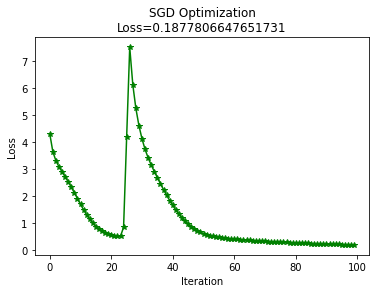

Training...
iter  0: y_pred = [ 0.00108, -0.00002,  0.00000, -0.00100, -0.00186, -0.00256], loss: 4.310e+00
iter 50: y_pred = [-0.55828, -0.63017, -0.99232, -1.07980, -0.26594,  0.72508], loss: 2.416e-01
Actual vs Predicted:
[-0.74654112 -0.63873121 -0.99740539 -0.98523556 -0.61536436  0.99904773]
[-0.6597688608475415, -0.6374425449213699, -1.0003941492065804, -0.9904697237226413, -0.3040602009717203, 0.6936808830841577]


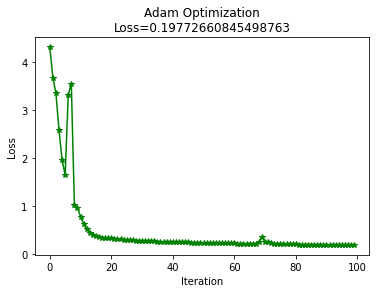

In [8]:
losses, predictions,loss=train('rmse','sgd')
print("Actual vs Predicted:")
print(Y)
print(predictions)
createGraph(losses,"SGD Optimization\nLoss="+str(loss))
losses, predictions,loss=train('rmse','adam')
print("Actual vs Predicted:")
print(Y)
print(predictions)
createGraph(losses,"Adam Optimization\nLoss="+str(loss))

#### Реализация LSTM с помощью NumPy взята [здесь](https://mattgorb.github.io/lstm_numpy)

### <span class="burk">Задание 4$^*$.</span>
**Предложите свои варианты решения проблемы исчезающего градиента в RNN.**  
 1. Использование других функций активации (т. н. выпрямители):
   * GeLU - Линейная единица измерения ошибки Гаусса
   * SiLU - Sigmoid Linear Unit
   * softplus
   * Параметрическое ReLU
 2. Более быстрое оборудование
 3. Остаточные нейронные сети
 4. Применение алгоритмов не основанных на градиенте

__*Комментарии преподавателя:*__<br>
*Милена Сокол・Преподаватель<br>*

Здравствуйте

Спасибо большое, очень хорошая и интересная работа  
Хорошо получилось со статьей с вики